# **Clustering Definition**

Clustering is an unsupervised machine learning strategy for grouping data points into several groups or clusters. By arranging the data into a reasonable number of clusters, this approach helps to extract underlying patterns in the data and transform the raw data into meaningful knowledge.


**Data preprocessing**

In [46]:
!pip install --upgrade numpy scikit-learn scikit-learn-extra

Found existing installation: numpy 2.2.6
Uninstalling numpy-2.2.6:
  Successfully uninstalled numpy-2.2.6
Found existing installation: scikit-learn-extra 0.3.0
Uninstalling scikit-learn-extra-0.3.0:
  Successfully uninstalled scikit-learn-extra-0.3.0
  Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached scikit_learn_extra-0.3.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.6 kB)
Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
Using cached scikit_learn_extra-0.3.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have nump

In [48]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("/content/Instagram visits clustering.csv")

X = df[['Instagram visit score', 'Spending_rank(0 to 100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df.head()

,User ID,Instagram visit score,Spending_rank(0 to 100)
0,0,63,24.050708
1,1,61,25.223290
2,2,104,18.528245
3,3,82,86.890232
4,4,14,31.492397


# **K Means Clustering**
- Assigns data points to k clusters by minimizing variance within clusters.
- Uses centroids (mean of points in a cluster) to update assignments iteratively.


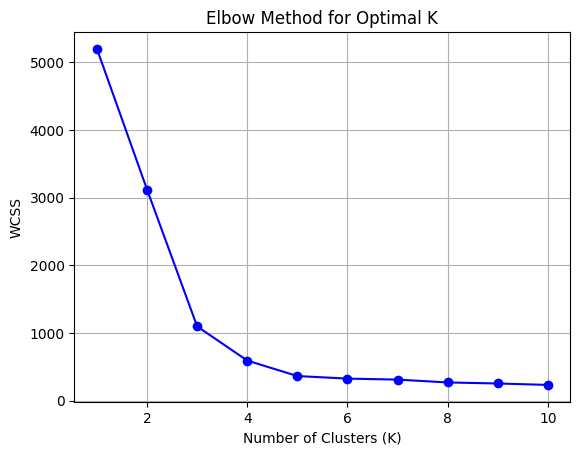

In [49]:
wcss = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(K_range, wcss, 'bo-')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.grid()
plt.show()

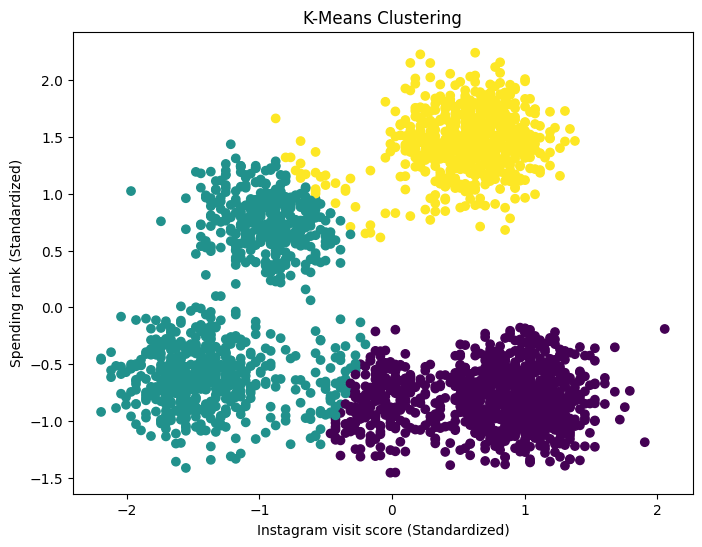

In [50]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=df['KMeans_Cluster'], cmap='viridis', marker='o')
plt.title("K-Means Clustering")
plt.xlabel("Instagram visit score (Standardized)")
plt.ylabel("Spending rank (Standardized)")
plt.show()

*We achieved distinct clusters based on visit scores and spending rank. The method works well when clusters are spherical and evenly distributed. However, it's sensitive to outliers and initial centroid placements.*

# **K Medoids Clustering**
- Similar to K-Means but uses actual data points (medoids) instead of centroids.
- More robust to outliers since medoids are actual samples rather than computed averages.


In [51]:
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt

kmedoids = KMedoids(n_clusters=3, random_state=42)
df['KMedoids_Cluster'] = kmedoids.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=df['KMedoids_Cluster'], cmap='plasma', marker='o')
plt.title("K-Medoids Clustering")
plt.xlabel("Instagram visit score (Standardized)")
plt.ylabel("Spending rank (Standardized)")
plt.show()

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

# **Agglomerative Clustering**
- A bottom-up approach that starts with individual points and merges them iteratively.
- Forms a hierarchical structure and does not require pre-defined clusters.
- Different linkage methods decide how clusters merge


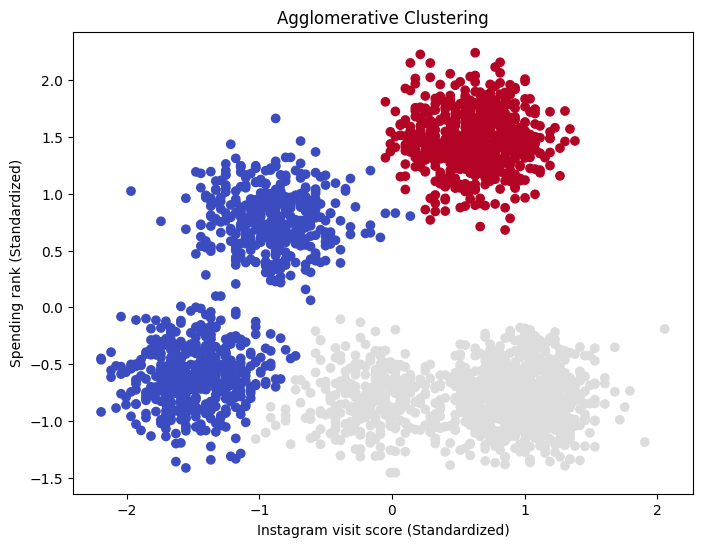

In [52]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=3)
df['Agglomerative_Cluster'] = agglo.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=df['Agglomerative_Cluster'], cmap='coolwarm', marker='o')
plt.title("Agglomerative Clustering")
plt.xlabel("Instagram visit score (Standardized)")
plt.ylabel("Spending rank (Standardized)")
plt.show()

*It allowed for flexible clustering without requiring the number of clusters beforehand.*

# **Agglomerative Hierarchical Clustering using Single Linkage**
- Uses minimum distance between points of different clusters to merge them.
- Tends to form long, chain-like clusters and works well when clusters are well-separated.
- Can be sensitive to noise, often forming elongated clusters.


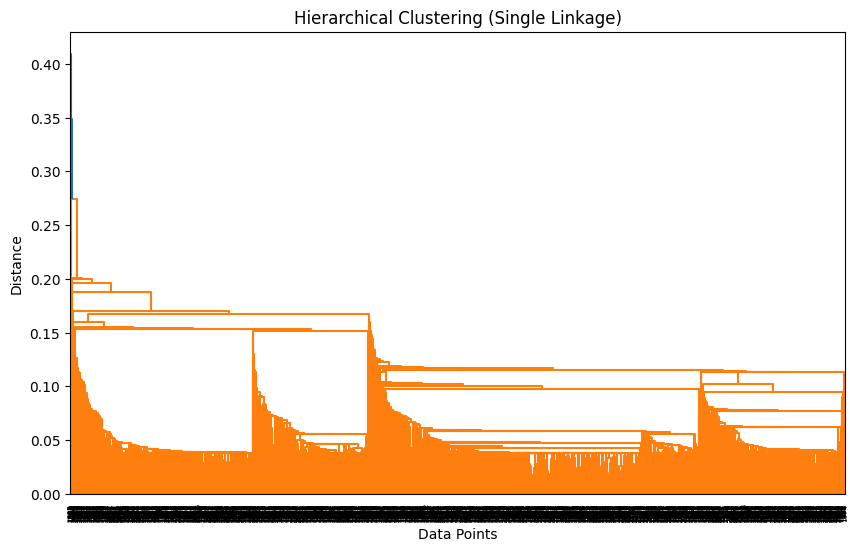

In [53]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10,6))
sch.dendrogram(sch.linkage(X_scaled, method='single'))
plt.title("Dendrogram for Hierarchical Clustering (Single Linkage)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

*The chain-like structure shows possible sub-group connections but may result in less compact clusters.
*

# **Agglomerative Hierarchical Clustering using Complete Linkage**
- Merges clusters based on maximum pairwise distance between points in clusters.
- Produces compact clusters that are evenly distributed.
- Useful when clusters are expected to be well-defined and separate


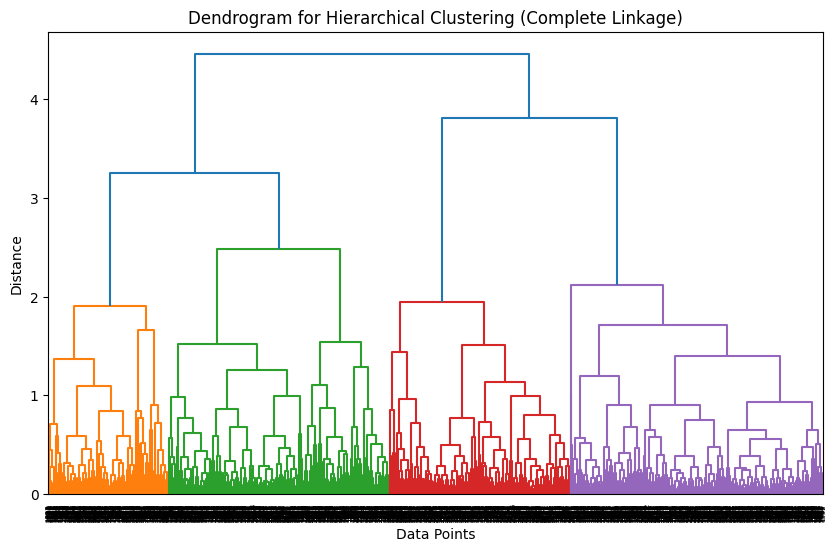

In [54]:
plt.figure(figsize=(10,6))
sch.dendrogram(sch.linkage(X_scaled, method='complete'))
plt.title("Dendrogram for Hierarchical Clustering (Complete Linkage)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

*Produced balanced and compact clusters, preventing elongated shapes. This method ensures better separation between distinct groups in the dataset.*
